# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### 1. Numerical Data Plotting

 - relplot()
 - scatterplot()
 - lineplot()

### 2. Categorical Data Plotting

 - catplot()
 - boxplot()
 - stripplot()
 - swarmplot()
 - etc...

### 3. Visualising Distribution of the Data

 - distplot()
 - kdeplot()
 - jointplot()
 - rugplot()

### 4. Linear Regression and Relationship

 - regplot()
 - lmplot()

### 5. Controlling Plotted Figure Aesthetics

 - figure stling 
 - axes styling
 - color palettes
 - etc...

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Numerical Data Plotting

In [2]:
sns.set(style = 'darkgrid')

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [5]:
tips.shape

(244, 7)

#### Plotting Relational Plot

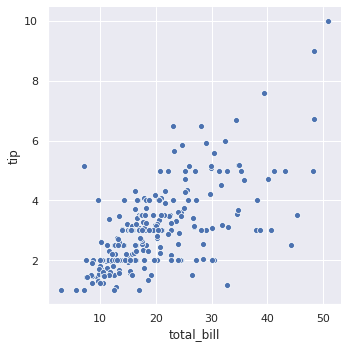

In [6]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips)

This plot by default outputs FacetGrid. By typing dir(sns.FacetGrid), we get all related methods

In [7]:
dir(sns.FacetGrid)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bottom_axes',
 '_clean_axis',
 '_facet_color',
 '_facet_plot',
 '_finalize_grid',
 '_get_palette',
 '_inner_axes',
 '_left_axes',
 '_legend_out',
 '_margin_titles',
 '_not_bottom_axes',
 '_not_left_axes',
 '_update_legend_data',
 'add_legend',
 'ax',
 'despine',
 'facet_axis',
 'facet_data',
 'map',
 'map_dataframe',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels']

By setting hue and style, we can introduce 3rd and 4th parameter to plotting

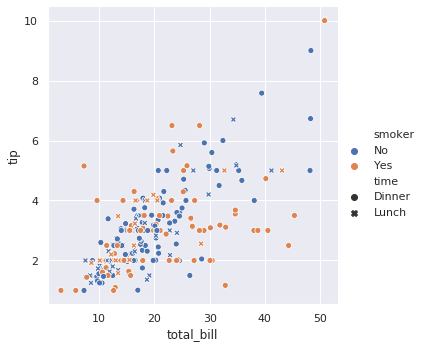

In [8]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time')

In [9]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

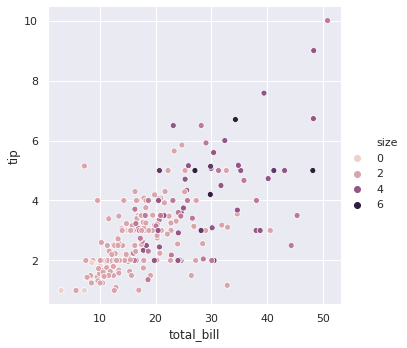

In [10]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'size')

Before the data entered into hue and style were categorical and here it is numerical data and hence we use qualitative palletts

 More over from the above plot we are able to infer that when the size of the family increases then tip is more

If we want to change that color from violet to something, do the following 

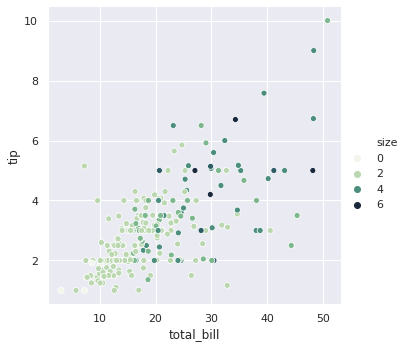

In [11]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips, palette = 'ch:r = -0.5, l = 0.95')

If we want to increase the size of the circles based on their corresponding values, 

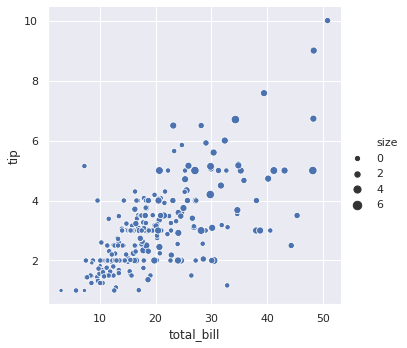

In [12]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size')

If we want to increase the sizes of these data points, we can provide a range of values between which the datapoints size will be normalized

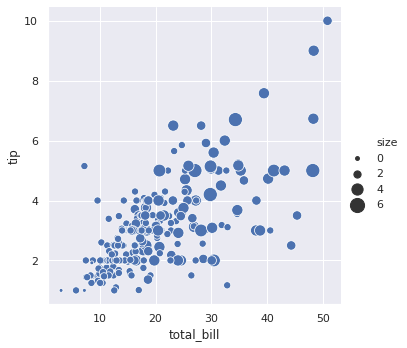

In [13]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size', sizes = (15,200))

#### Working with lineplot

 Here we are not going to use tips data rather a new dataset
 

In [14]:
from numpy.random import randn

In [15]:
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))

In [16]:
df.head()

time     value
0     0  0.142689
1     1 -0.674677
2     2 -1.284904
3     3 -1.280171
4     4  0.163789

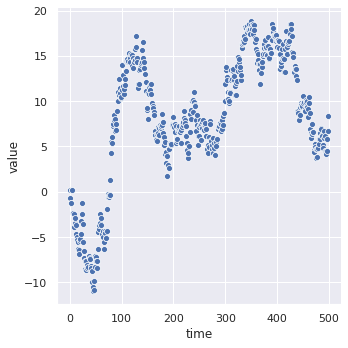

In [17]:
sns.relplot(data = df, x = 'time', y = 'value')            #This is ordinary relplot

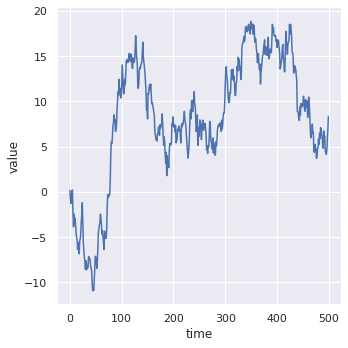

In [18]:
 sns.relplot(data = df, x = 'time', y = 'value', kind = 'line')

We have another parameter named sort which will not make any big difference in the above plot.
So we generate another dataframe

In [19]:
df = pd.DataFrame(randn(500, 2).cumsum(axis = 0), columns = ['time','value'])
df

time      value
0    -0.210395   0.879334
1    -0.490564  -0.587968
2    -0.098774   0.797602
3     0.266472   1.829237
4     2.519415   2.090009
..         ...        ...
495  11.795464  -9.535786
496  12.692169  -9.498196
497  12.387172 -10.882322
498  12.058402  -9.443015
499  13.230550  -8.982372

[500 rows x 2 columns]

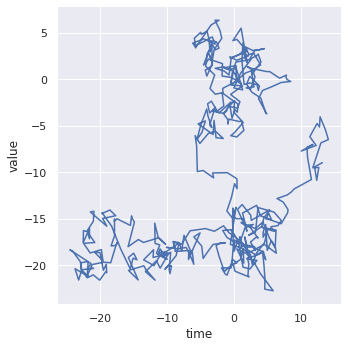

In [20]:
sns.relplot(data = df, x = 'time', y = 'value', kind = 'line', sort = False)

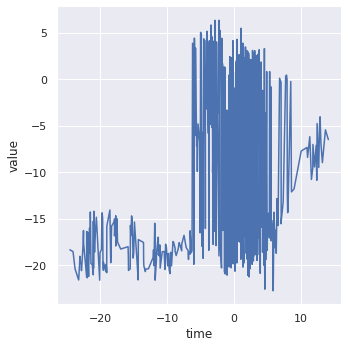

In [21]:
sns.relplot(data = df, x = 'time', y = 'value', kind = 'line', sort = True)

In [22]:
fmri = sns.load_dataset('fmri')

In [23]:
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

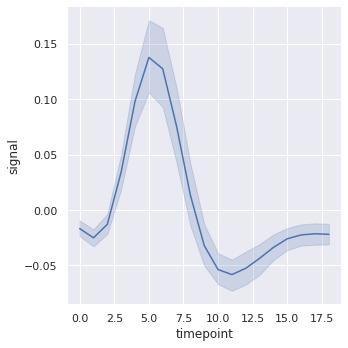

In [24]:
sns.relplot(x = 'timepoint', y = 'signal',data = fmri, kind = 'line')

The shaded region along the actual line is called confidence interval and that means for a particular value of x the value of y will definetly lie in the shaded part only. If we dont want that to be shown make ci = False

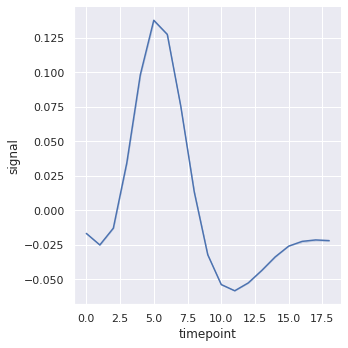

In [25]:
sns.relplot(x = 'timepoint', y = 'signal',data = fmri, kind = 'line', ci = False)

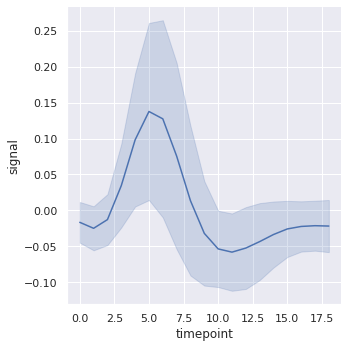

In [26]:
sns.relplot(x = 'timepoint', y = 'signal',data = fmri, kind = 'line', ci = 'sd')     # if we want that shaded region to be standard deviation

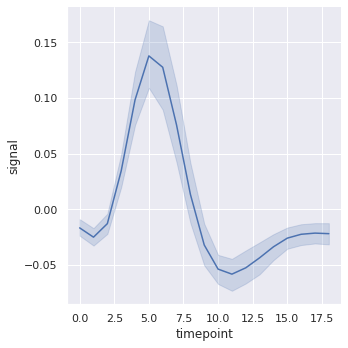

In [27]:
sns.relplot(data = fmri, x = 'timepoint', y = 'signal', kind = 'line')

Here we dont see any fluctuations in the data. even though we have data points which are fluctuating in real data. This is becz of estiamator being turned on. Try doing estimator = False

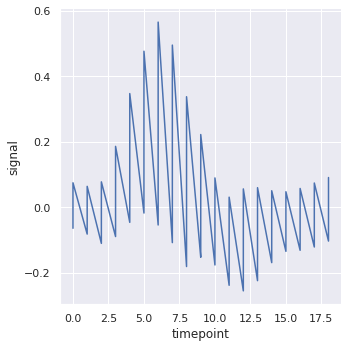

In [28]:
sns.relplot(x = 'timepoint', y = 'signal', data = fmri, kind = 'line', estimator = None)

Lets go and do semantic mapping like we did in scatterplot where we had hue, size, style... the same way we can do

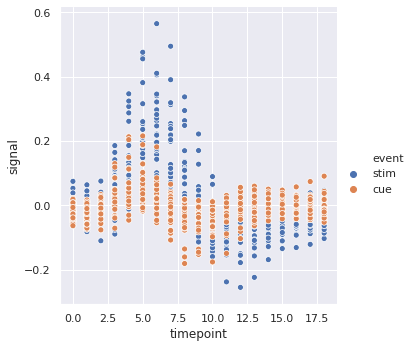

In [29]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', data = fmri )

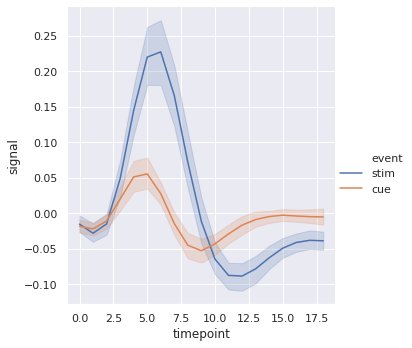

In [30]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event',kind = 'line', data = fmri )

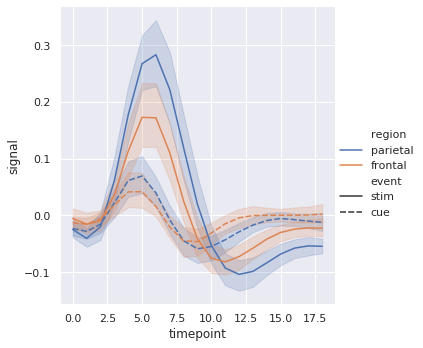

In [31]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', data = fmri, kind = 'line', style = 'event')

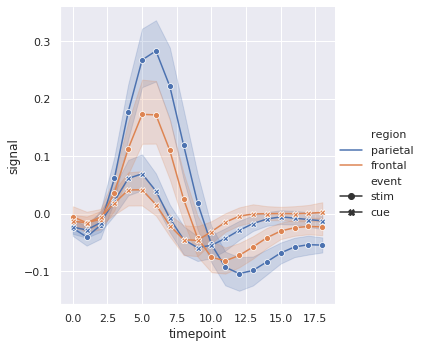

In [32]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', data = fmri, kind = 'line', style = 'event', markers = True, dashes = False)

If we add both hue and style, then we have both line and color change

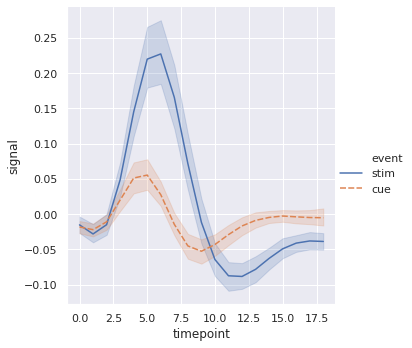

In [33]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', data = fmri, kind = 'line', style = 'event')

If we have only hue, there is a color change

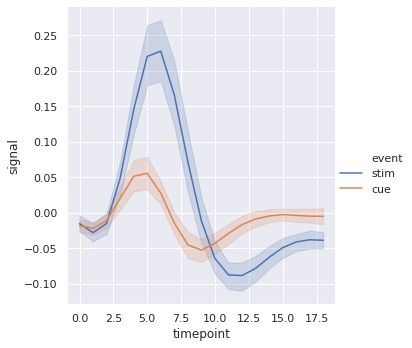

In [34]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', data = fmri, kind = 'line')

With only style there is just a style change,

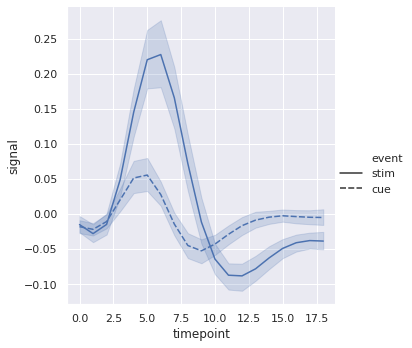

In [35]:
sns.relplot(x = 'timepoint', y = 'signal', style = 'event', data = fmri, kind = 'line')

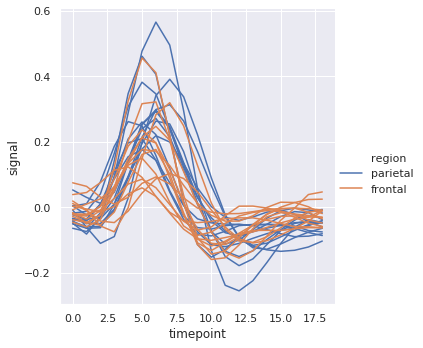

In [36]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', units = 'subject', data = fmri.query("event =='stim'"), kind = 'line', estimator = None)

To change something with colors, we use another dataset

In [37]:
dots = sns.load_dataset('dots').query("align == 'dots'")

In [38]:
dots

align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
..    ...    ...   ...        ...          ...
389  dots     T2   680        3.2    37.806267
390  dots     T2   700        0.0    43.464959
391  dots     T2   700        3.2    38.994559
392  dots     T2   720        0.0    41.987121
393  dots     T2   720        3.2    41.716057

[394 rows x 5 columns]

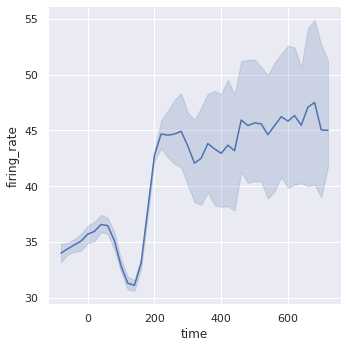

In [39]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line')

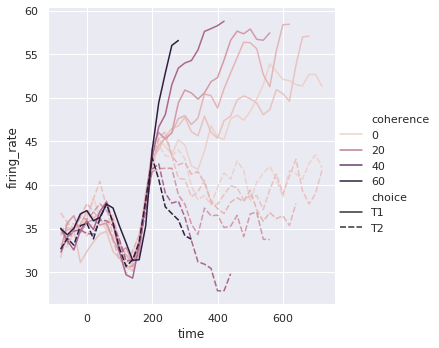

In [40]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice')

We can plot each line in coherence with seperate color like 4 different colors, we need to pass a dict for that

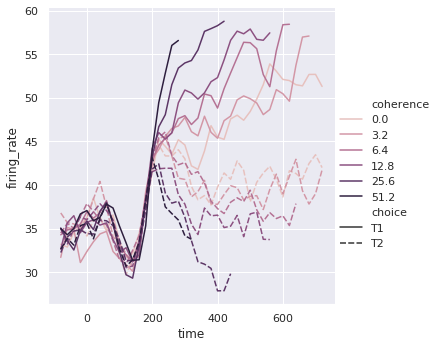

In [41]:
palette = sns.cubehelix_palette(light = 0.8, n_colors = 6)
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice', palette = palette)

To change the width of the lines based on intensity

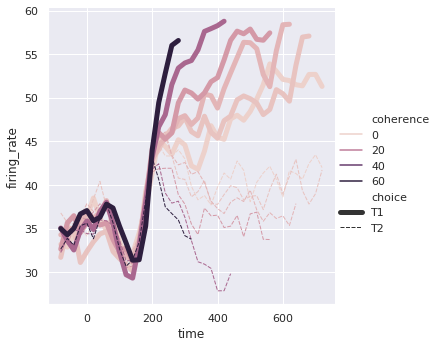

In [42]:
sns.relplot(x = 'time', y = 'firing_rate', hue = 'coherence', size = 'choice', style = 'choice', kind = 'line', data = dots, sizes= (1,5))

If we have date or tym values in our data,

In [43]:
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02',periods = 500), value = randn(500).cumsum()))

In [44]:
df.head()

time     value
0 2019-06-02  1.601370
1 2019-06-03  1.657949
2 2019-06-04  1.935008
3 2019-06-05  3.101293
4 2019-06-06  1.448018

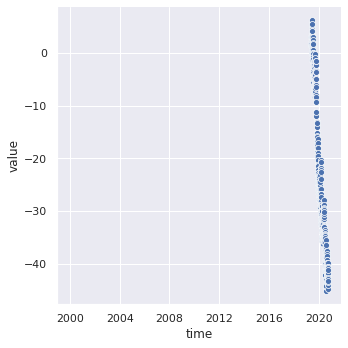

In [45]:
sns.relplot(x = 'time', y = 'value', data = df)

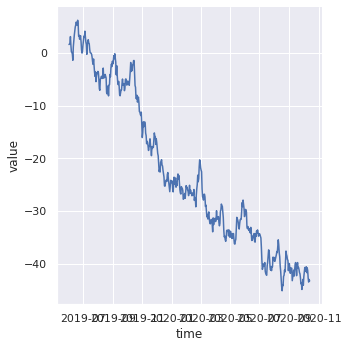

In [46]:
sns.relplot(x = 'time', y = 'value', data = df, kind = 'line')

The tym is mixed up and hence the data is not shown clearly

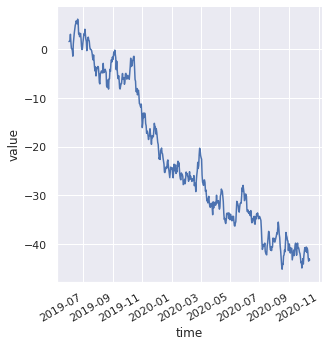

In [47]:
g = sns.relplot(x = 'time', y = 'value', data = df, kind = 'line')
g.fig.autofmt_xdate()

With facets we can plot multiple plots simultaneously

In [48]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

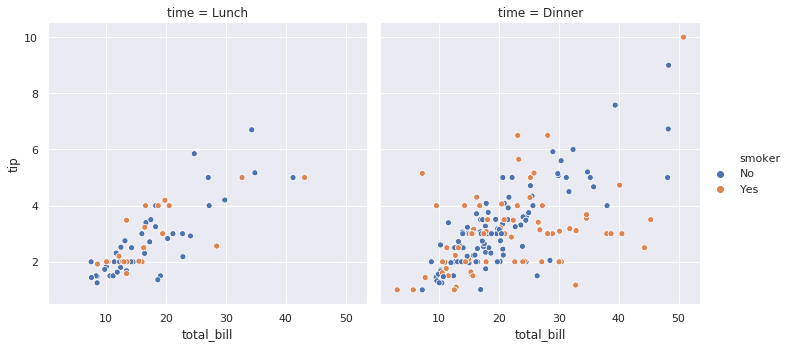

In [49]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = tips)

Here col is the extra paramenter that we have passed which we didnt do earlier

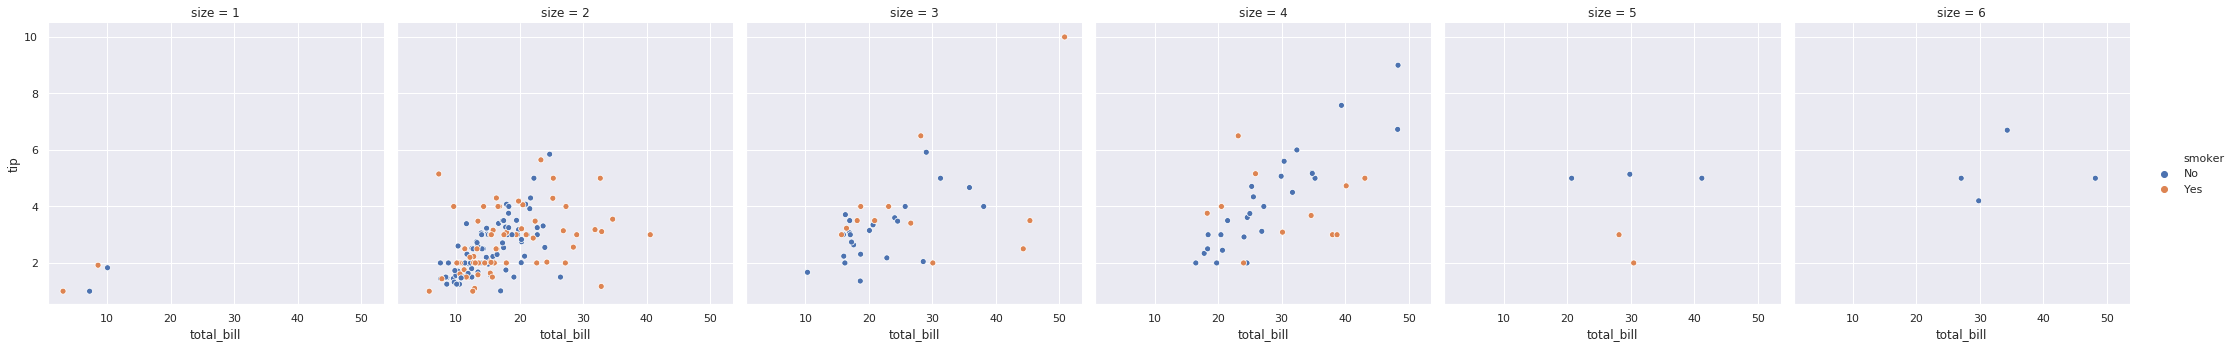

In [50]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips)

If we pass row instead of col it will show row wise

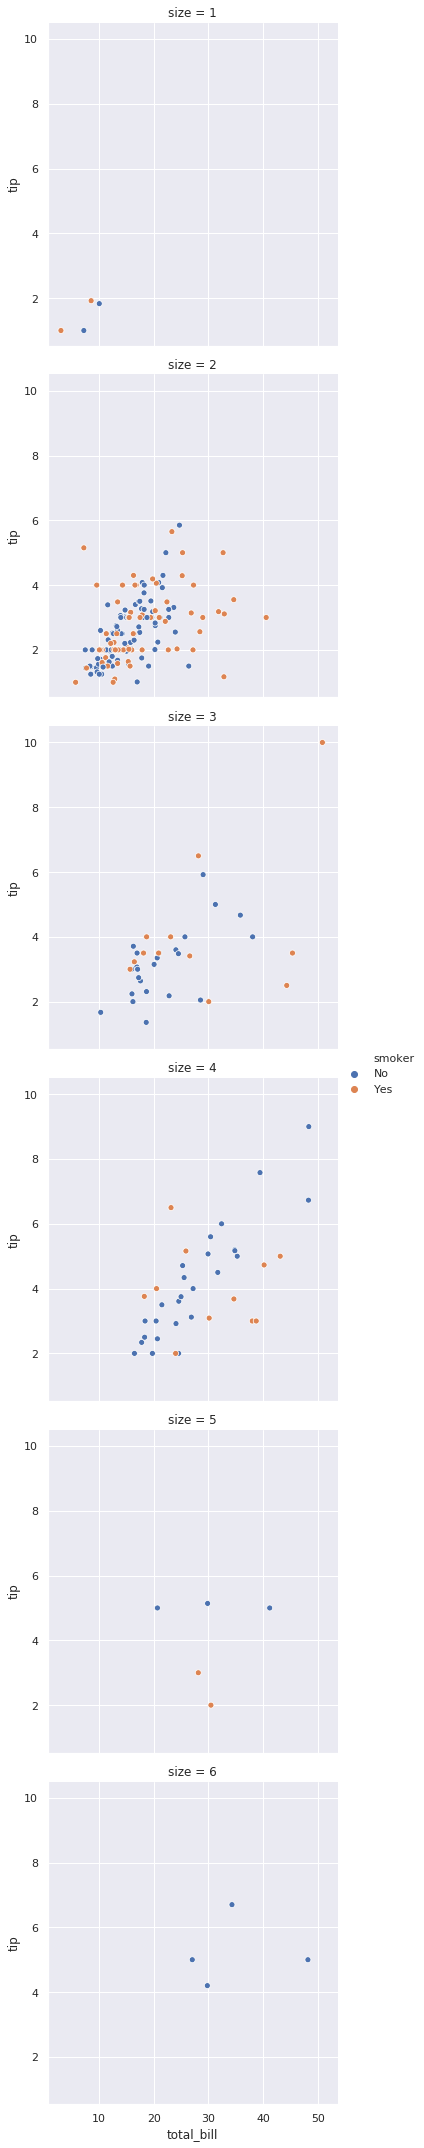

In [51]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', row = 'size', data = tips)

Lets see how to plot 2X2 facet grid

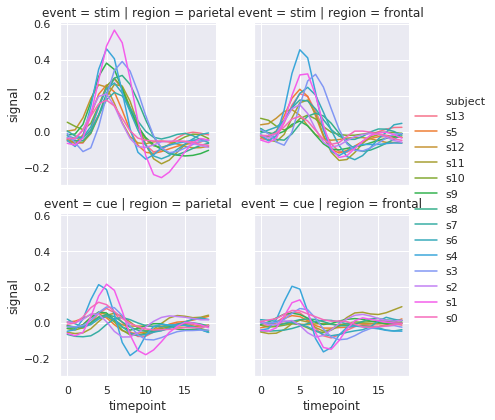

In [52]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'subject', col = 'region', row = 'event', height = 3,kind = 'line',
            estimator = None, data = fmri)

If estimator is not given as None then it will calculate confidence interval. Here height parameter is to decide the height of individual plots

Now lets see how we can make tips data set into a 2x3 grid

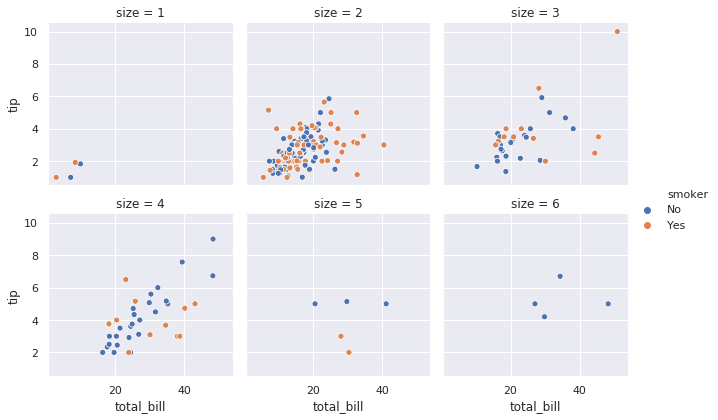

In [53]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips,col_wrap = 3, height = 3)

With the above plot, we are able to understand that size 2,3,4 families give more tips and also are frequent visitors

This can also be done using lineplot


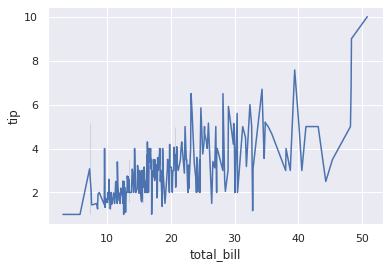

In [54]:
sns.lineplot(x = 'total_bill', y = 'tip', data = tips)

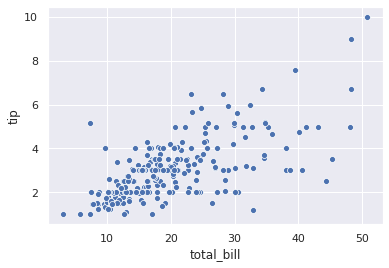

In [55]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

Lets apply lineplot to fmri data

In [56]:
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

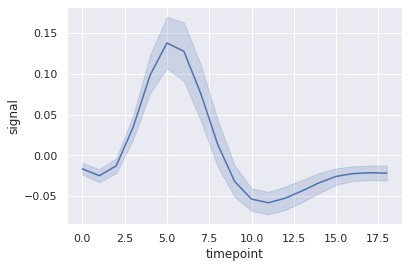

In [57]:
sns.lineplot(x= 'timepoint',y = 'signal', data = fmri)

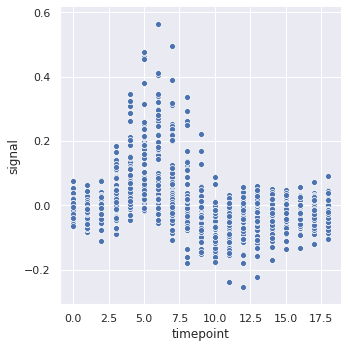

In [58]:
sns.relplot(x= 'timepoint',y = 'signal', data = fmri)

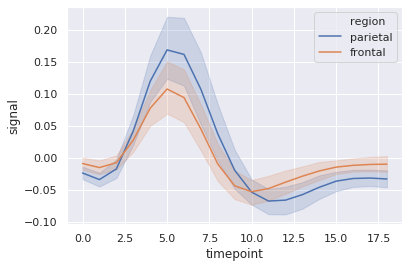

In [59]:
sns.lineplot(x= 'timepoint',y = 'signal', data = fmri, hue = 'region')   #hue with region

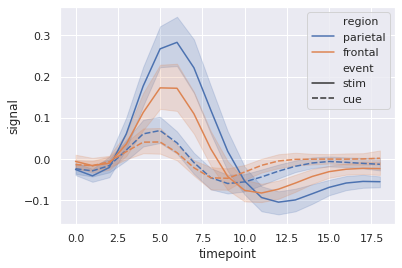

In [60]:
sns.lineplot(x= 'timepoint',y = 'signal', style = 'event', data = fmri, hue = 'region')    #hue with event

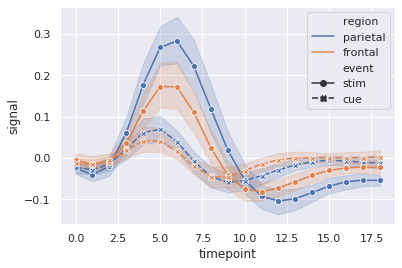

In [61]:
sns.lineplot(x= 'timepoint',y = 'signal', style = 'event', data = fmri, hue = 'region', markers = True)  #places marker 

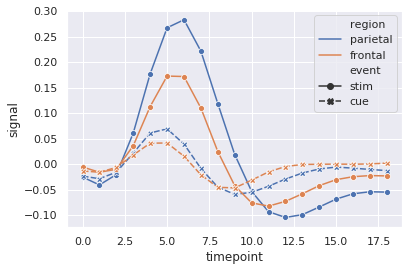

In [62]:
sns.lineplot(x= 'timepoint',y = 'signal', style = 'event', data = fmri, hue = 'region',
             markers = True, ci = None)                    #No confidence interval

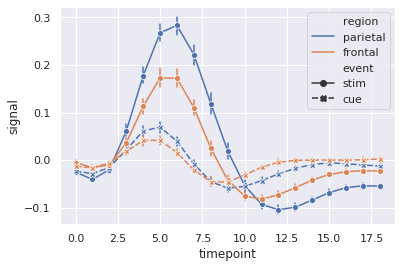

In [63]:
sns.lineplot(x= 'timepoint',y = 'signal', style = 'event', data = fmri, hue = 'region',
             markers = True, ci = 50, err_style = 'bars')                    #Setting error styles

The value of ci in the above plot is length of that vertical line..if we increase ci value then length of that vertical line also increases

Lets go ahead and plot these multiple subjects into different lines

In [64]:
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

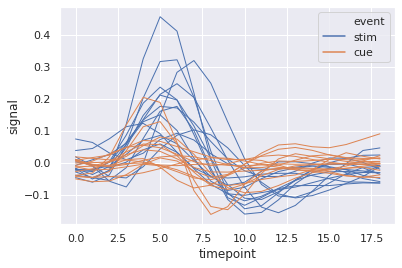

In [65]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', units = 'subject', estimator = None,
            lw = 1, data = fmri.query("region == 'frontal'") )  #here lw represents line width

Lets do similar thing with dots dataset

In [66]:
dots.head()

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

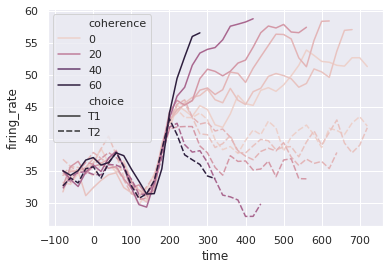

In [67]:
sns.lineplot(x = 'time', y = 'firing_rate', hue = 'coherence', style = 'choice', data = dots)

This is all about lineplot..lets now work on scatterplot

In [68]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

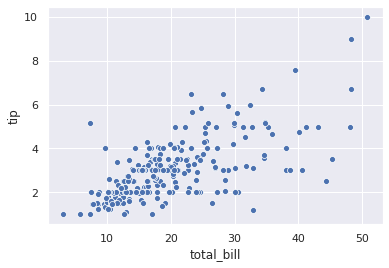

In [69]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

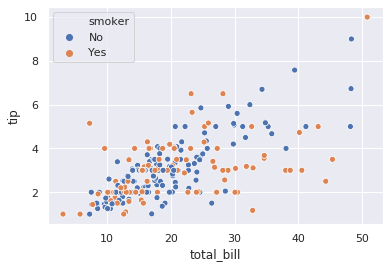

In [70]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker')

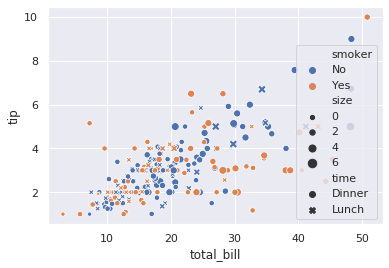

In [71]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', size = 'size',style = 'time')

Lets now work with iris dataset

In [72]:
iris = sns.load_dataset('iris')

In [73]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

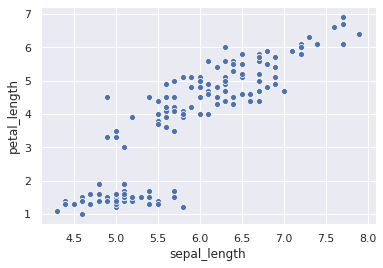

In [74]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length',data = iris)

If we dont want to pass iris as seperate argument to data, we can do

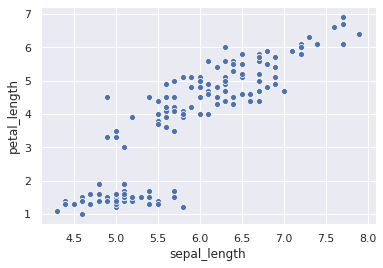

In [75]:
sns.scatterplot(x = iris['sepal_length'], y = iris['petal_length'])

## Categorical Data Plotting

For this lets load titanic data

In [76]:
titanic = sns.load_dataset('titanic')

In [77]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

How can we analyse this data with drawings and graphs

We can do this by using catplot, boxplot, stripplot, swarmplot, etc

Lets now see how to use catplot

- Default representation in catplot is scatterplot
- There are actually 2 different scatterplots in seaborn,they take diff approcahes to represent categorical data

Since tips dataset is small and no of categorical columns are less first lets go for tips data

In [78]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

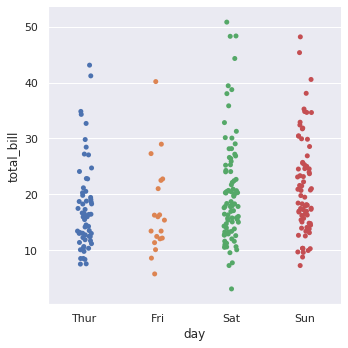

In [79]:
sns.catplot(x = 'day', y = 'total_bill', data = tips)

This is also scatter plot only but plotted along the categories

If we want to make the plot horizontal swap x and y

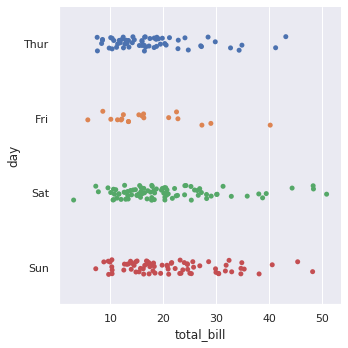

In [80]:
sns.catplot(y= 'day', x = 'total_bill', data = tips)

This plot is scattered around a particular region, and doesnt look nice. Lets now make jitter argument as False to get a straight line

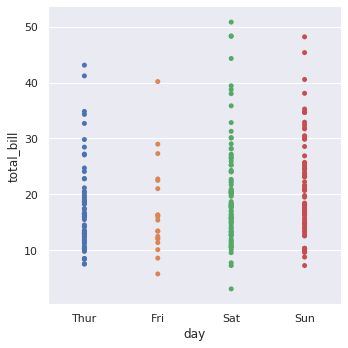

In [81]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, jitter = False)

For the above plotting the data is overlapped and hence not able to clearly come into a conclusion. so try kind =  swarm plot

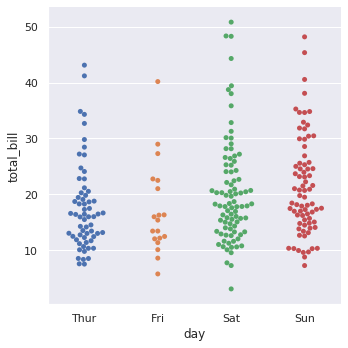

In [82]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm')

Similar to relplots, its also possible to add another dimension to categorical plots using hue semantics also

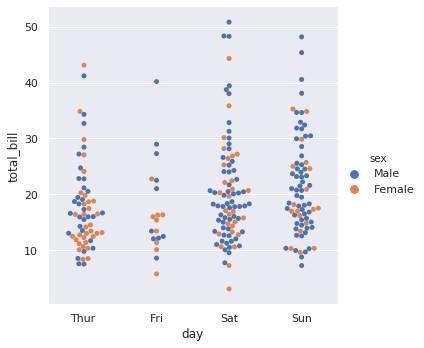

In [83]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm', hue = 'sex')

It fits 'Thur', 'Fri', 'Sat', 'Sun' directly from the data as data comes

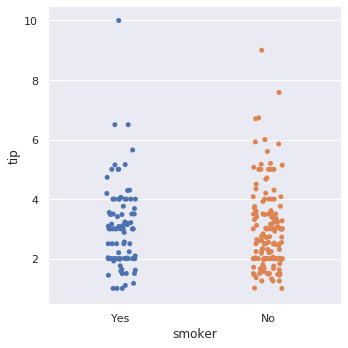

In [84]:
sns.catplot(x = 'smoker', y = 'tip', data = tips)

If we want 'No' first and 'Yes' next, then 

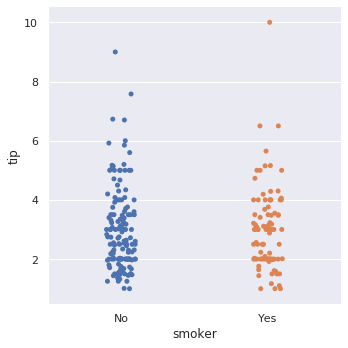

In [85]:
sns.catplot(x = 'smoker', y = 'tip', data = tips, order = ['No', 'Yes'])

The disadavantage with these plots are that we arenot getting any statistical info like mean, etc. This can be done using kind = box

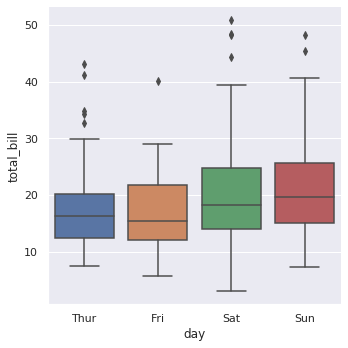

In [86]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'box')

Here we can also add hue 

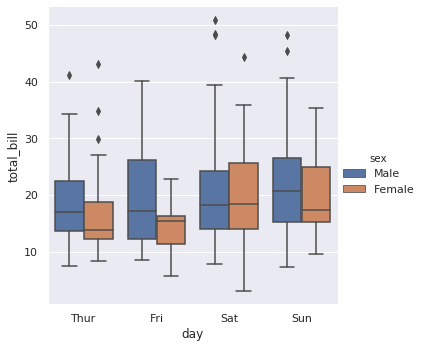

In [87]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'box', hue = 'sex')

This way of getting two boxes based on hue for the same categorical column is called dodging. If we dont want that, we can set it to false

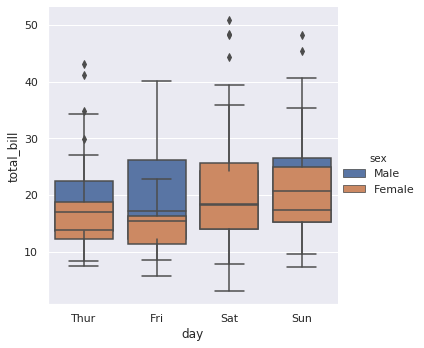

In [88]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'box', hue = 'sex', dodge = False)

Now this dodging has been removed 

We might feel that this boxplot is not showing enough info so, we can go for boxen plot

Lets take diamonds dataset for this

In [89]:
diamonds = sns.load_dataset('diamonds')

In [90]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

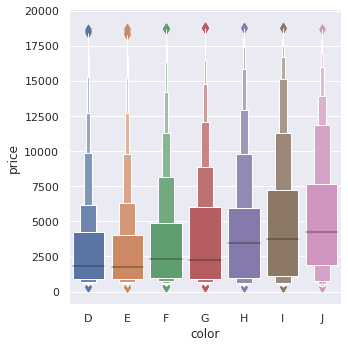

In [91]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds.sort_values('color'))

In [92]:
diamonds.sort_values('color')

carat        cut color clarity  depth  table  price     x     y     z
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64
7817    1.00  Very Good     D     SI2   63.5   59.0   4295  6.35  6.32  4.02
7816    1.00       Good     D     SI2   57.8   58.0   4295  6.61  6.55  3.80
7815    1.00  Very Good     D     SI2   61.5   63.0   4295  6.32  6.27  3.87
7809    0.56      Ideal     D      IF   61.9   57.0   4293  5.28  5.31  3.28
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
4861    1.00    Premium     J     SI1   60.8   58.0   3712  6.39  6.44  3.90
18421   1.52      Ideal     J     SI1   61.9   57.0   7491  7.37  7.33  4.55
18423   1.50  Very Good     J     VS2   62.6   58.0   7492  7.25  7.29  4.55
42108   0.65      Ideal     J     SI1   61.4   55.0   1276  5.58  5.62  3.44
14123   1.30      Ideal     J     SI1   61.5   55.0   5728  7.03  7.06  4.33

[53940 rows x 10 columns]

We have this data based on color becz we want to compare them based on color and hence we sorted that

Lets compare this with catplot with kind = box of tips data

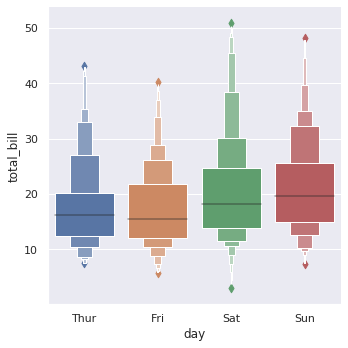

In [93]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'boxen', dodge = False)

Lets now work with kind = violin. violin plot has a different approach which combines kde(kernel density estimation) plot and box plot 

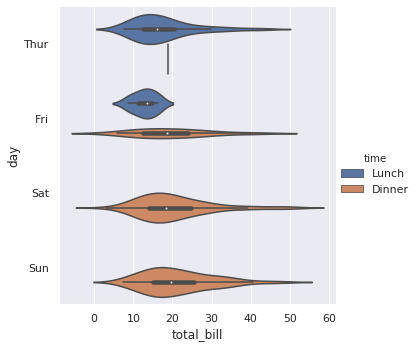

In [94]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'time', data = tips, kind = 'violin')

From this we can conclude that Dinner is most prefered at weekends and lunch at working days

Suppose we make hue as sex

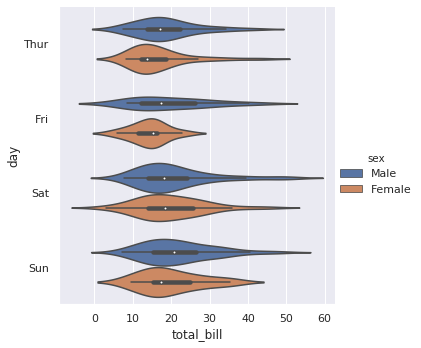

In [95]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex', data = tips, kind = 'violin')

Lets check the plot by setting split = True

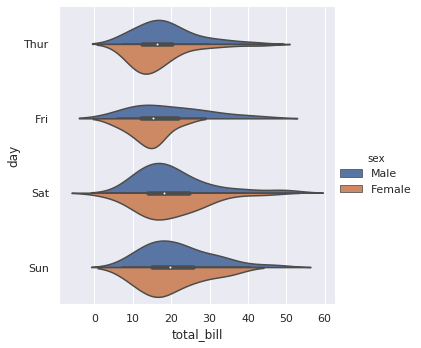

In [96]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex', data = tips, kind = 'violin', split = True)

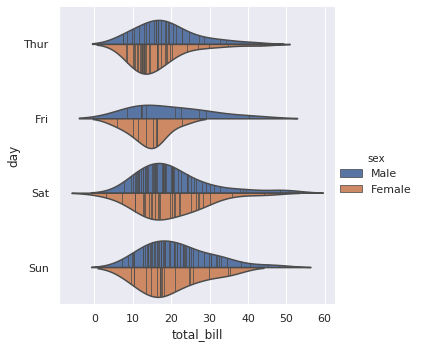

In [97]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex', data = tips, kind = 'violin', split = True, inner = 'stick')

Here sticks represent total bill

Lets now see how to add violin plot along with swarm plot

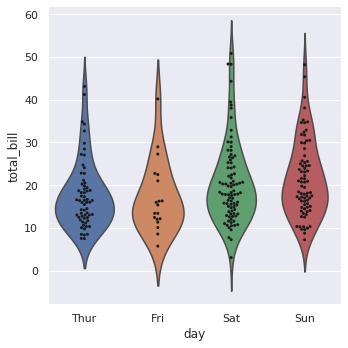

In [106]:
g = sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', data = tips, inner = None)    #inner parameter doesnt output the black line inside the plot
sns.swarmplot(x = 'day', y = 'total_bill', color = 'k', size = 3, data = tips, ax = g.ax)

If we have a requirment to visualize categorical plot versus categorical plot, then we can do as follows

In [107]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

Lets now see how survived is visualised based on sex or pclass

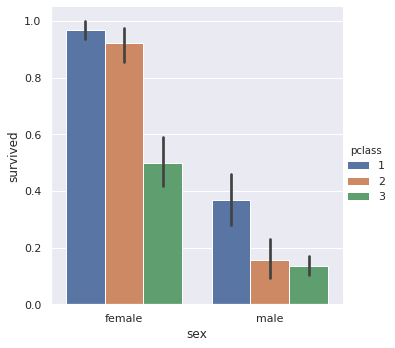

In [110]:
sns.catplot(x = 'sex', y = 'survived', data = titanic, kind = 'bar', hue = 'pclass', order = ['female','male'])

From above plot, we get to know that if a person is female and travelling in first class, she has the highest survival rate.

The vertical line represents the probability error

If we single color but change the gradient of the bar, then


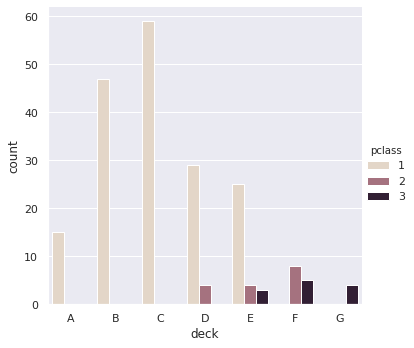

In [125]:
sns.catplot(x = 'deck', kind = 'count', data = titanic, palette = 'ch:0.2', hue = 'pclass')

There a plot named point plot

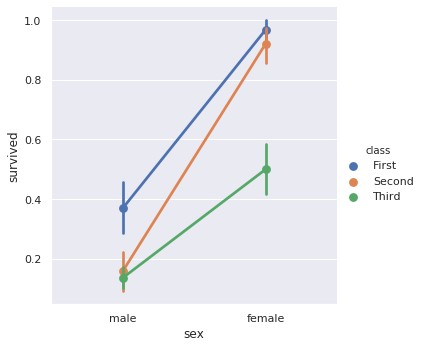

In [127]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'point', data = titanic)

## Visualising the distribution on data

Here we will understand and learn how the distrubution of data has been done, i.e. how a variable is distributed over the other

First we will see distribution plot

In [133]:
x = np.random.randn(100)
x

array([-0.38562685, -0.50570359, -0.1002229 , -0.62807699,  0.51926273,
       -1.56501957, -0.58643956, -0.35657106, -1.19142155,  0.93274678,
        0.1375703 ,  0.78733187, -1.13183696,  1.08418873, -0.26627828,
       -1.36211982,  1.14837058,  2.38488874,  0.64966195, -0.14589041,
        0.38027256, -0.37874474, -0.44922361,  0.8110517 , -0.49970893,
       -0.51454303, -1.11108883, -0.68614212, -0.82701058,  0.22910578,
        2.1239678 , -1.22165962,  0.10992048,  0.533765  ,  1.80198597,
        0.7375405 , -1.74259058, -0.77241887, -0.61381494,  0.73384585,
       -1.35994975,  1.56618907, -0.60784823, -2.10858696, -0.00587217,
        0.80504617, -0.46167931, -0.82186349, -1.43795483, -0.18650743,
        0.07849225, -0.85120305,  0.93096951, -0.00983344,  1.00372453,
        1.56100432, -0.14111921, -1.152706  ,  1.19868813,  0.01400669,
        0.53744192, -2.048638  , -0.55603626,  0.61814458,  1.35851811,
       -0.00969767, -0.52456674,  0.53871712, -1.18070364,  0.76

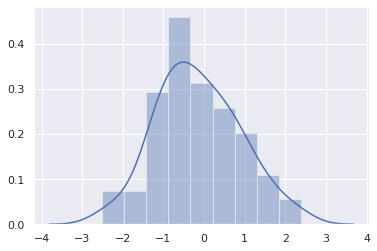

In [136]:
sns.distplot(x)

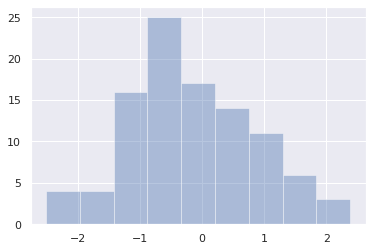

In [137]:
sns.distplot(x, kde = False)

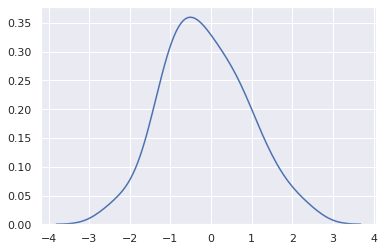

In [139]:
sns.distplot(x, hist = False)

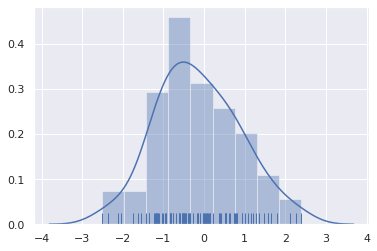

In [140]:
sns.distplot(x, rug = True)

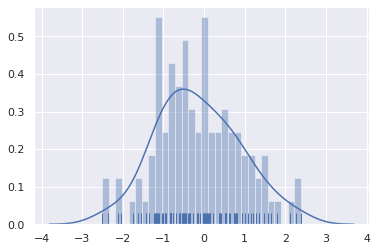

In [143]:
sns.distplot(x, rug = True, bins = 30)

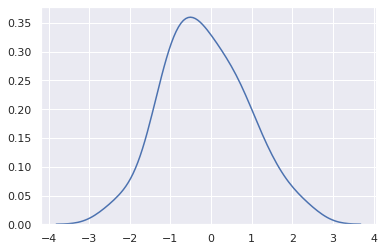

In [144]:
sns.kdeplot(x)

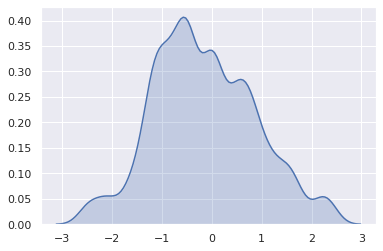

In [159]:
sns.kdeplot(x, shade = True, bw = 0.2)      #bw changes the shape of the kde plot     

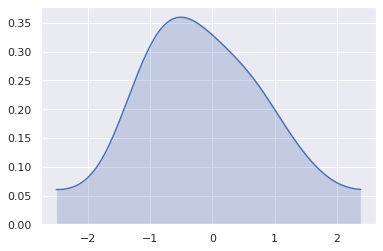

In [161]:
sns.kdeplot(x, shade = True, cut = 0)

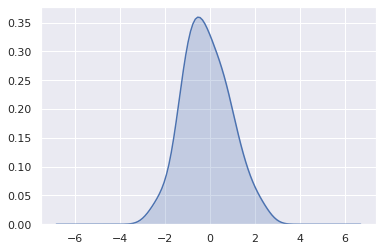

In [162]:
sns.kdeplot(x, shade = True, cut = 10)

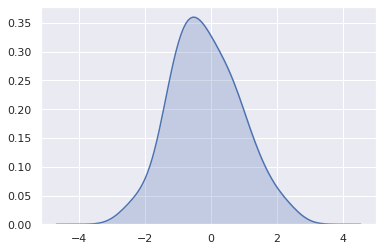

In [165]:
sns.kdeplot(x, shade = True, cut = 5)

Lets now see how to plot bivariate distribution

In [168]:
tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [169]:
x = tips['total_bill']
y = tips['tip']

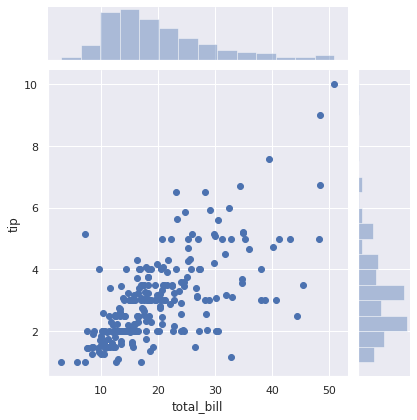

In [180]:
sns.jointplot(x, y)

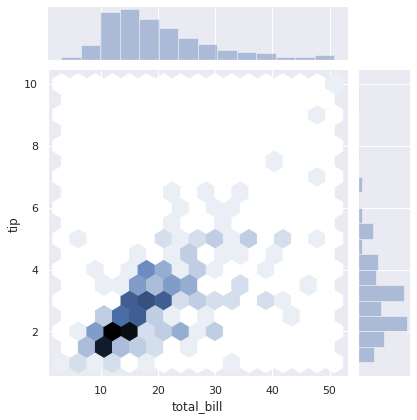

In [181]:
sns.jointplot(x, y, kind = 'hex')

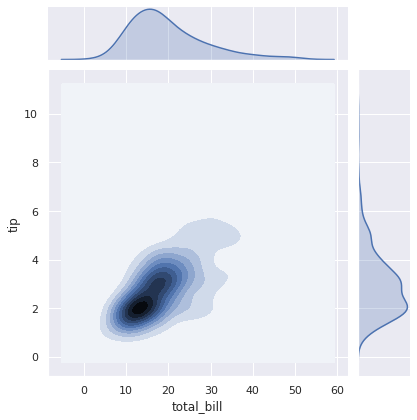

In [183]:
sns.jointplot(x, y, kind = 'kde')

Plotting this kde plot in a different way

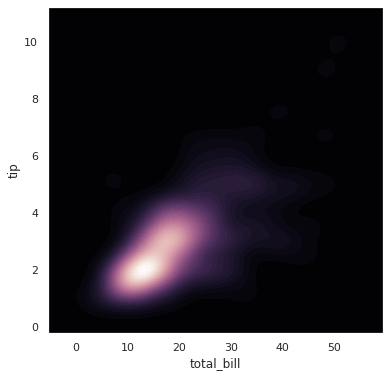

In [190]:
f, ax = plt.subplots(figsize = (6,6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True)
sns.kdeplot(x,y,cmap = cmap,n_levels = 60, shade = True)

Here bright light is somewhere between 10 and 20 sayinh that total_bill is mostly near 10 to 20

There is another way to get this plot

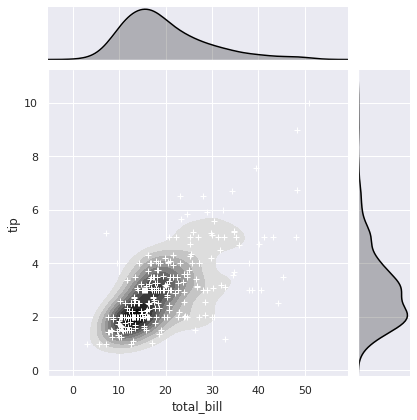

In [198]:
g = sns.jointplot(x, y, kind = 'kde', color = 'black')
#now plotting collection plot
g.plot_joint(plt.scatter ,c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)

Now lets see pairplot

To plot a multiple pairwise bivariate distribution in the dataset, we go for pairplot

In [199]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

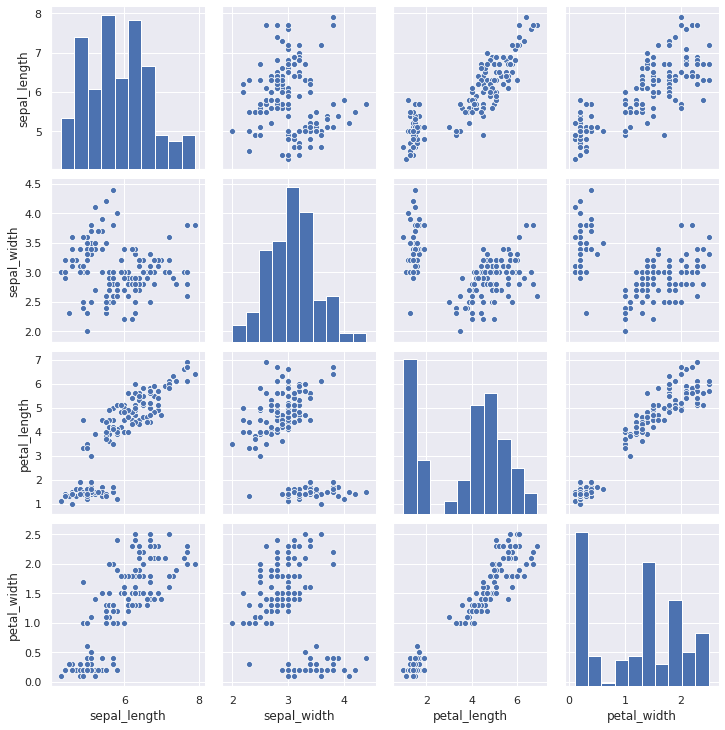

In [200]:
sns.pairplot(iris)

By default, pairplot takes diagonal elements which are univariate and plots barplot for them and it takes non diagonal elements and plots them as scatterplots

We can change the plot types by returns object from sns pairgrid

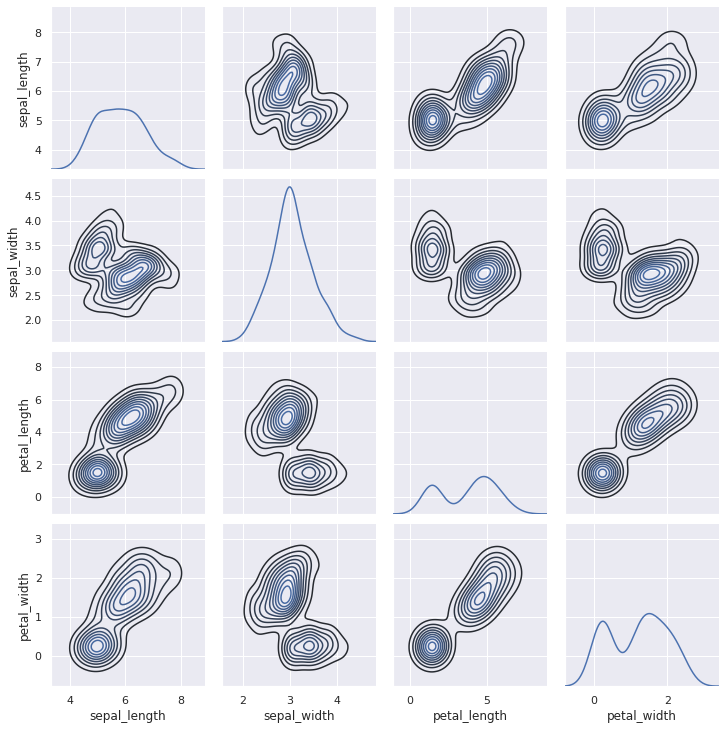

In [205]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)

## Linear Regression and Relationship

We will see regplot and lmplot... for that we will take tips data

In [207]:
tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

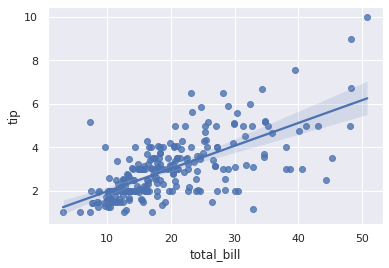

In [210]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

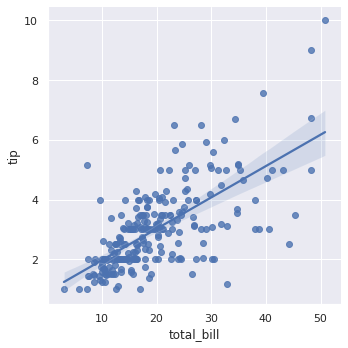

In [211]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

Both of them show same plots...but there are some differences that will be discussed later

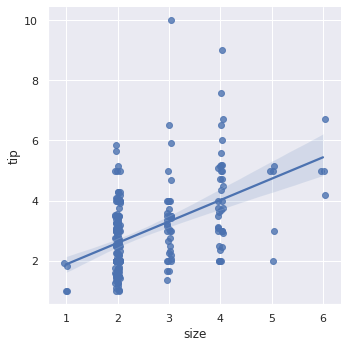

In [216]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_jitter = 0.05)  # if we dont give x_jitter then it will be staright line

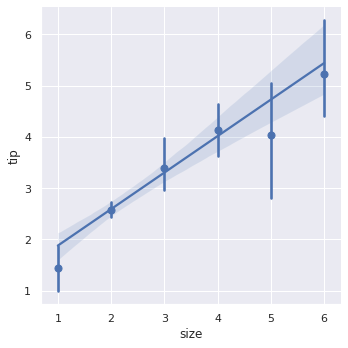

In [221]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_estimator = np.mean)   
#this x_estimator calculates the mean and draw a vertical line on every x value 

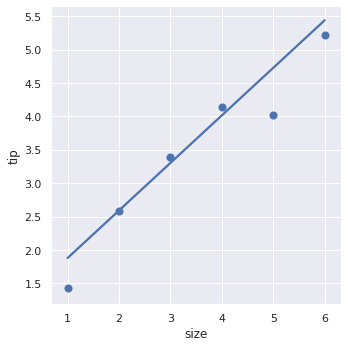

In [222]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_estimator = np.mean , ci = False)
#if we put ci = False that means it doesnt show the confidence interval

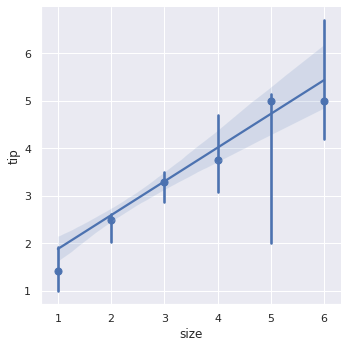

In [225]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_estimator = np.median)   
#we can also set median instead of mean

If data doesnt have a linear relationship, then how do we fit it?

In [226]:
data = sns.load_dataset('anscombe')

In [232]:
data.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

In [233]:
data['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

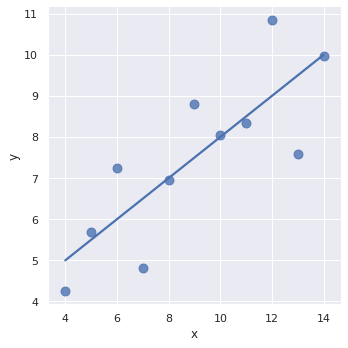

In [236]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'I'"), ci = None, scatter_kws = {'s':80})
#scatter_kws is to increase the size of the data points

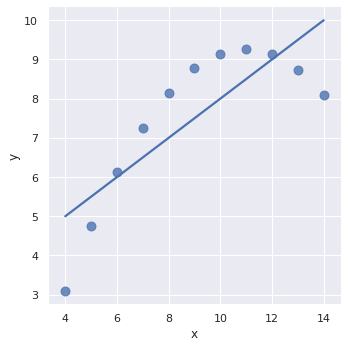

In [237]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'II'"), ci = None, scatter_kws = {'s':80})


Even though the dataset is not linear, it has fitted a linear line.

To fit a polynomial relation, we have a parameter called order

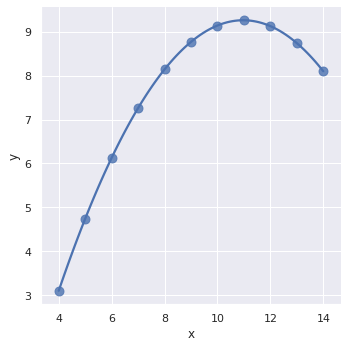

In [243]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'II'"), ci = None, scatter_kws = {'s':80}, order = 2)
#order = 2 means it has fitted a polynomial line of order 2

Now, lets see how our plots like linear fitting,polynomial fitting are affected by outliers

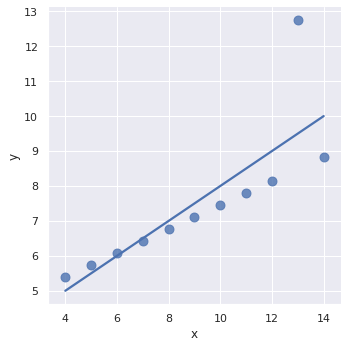

In [246]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'III'"), ci = None, scatter_kws = {'s':80})

In the above dataset, there is an outlier.. and because of that even though its linear dataset, the line has moved away to the outlier.

In order to get rid of these outliers, we need to set parameter robust=True

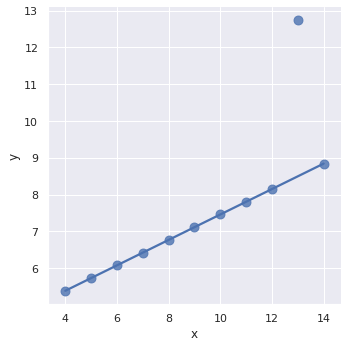

In [247]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'III'"), ci = None, scatter_kws = {'s':80}, robust = True)


Now lets see how we can do conditioning on other variables and how we plot them


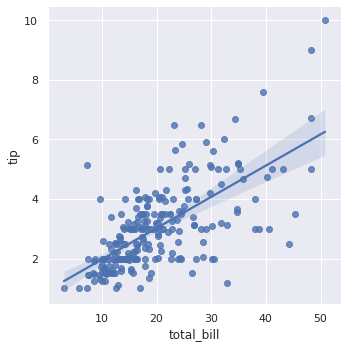

In [249]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

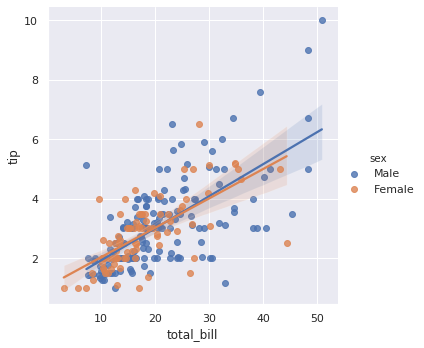

In [250]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

From above plot we can infer that we get two lines, one for male and one for female.. we can also set markers

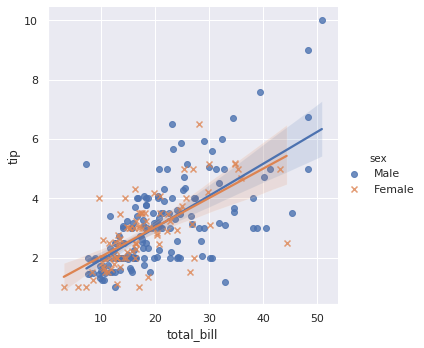

In [251]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o','x'])

There are few more things that we can visualize by setting columns and rows

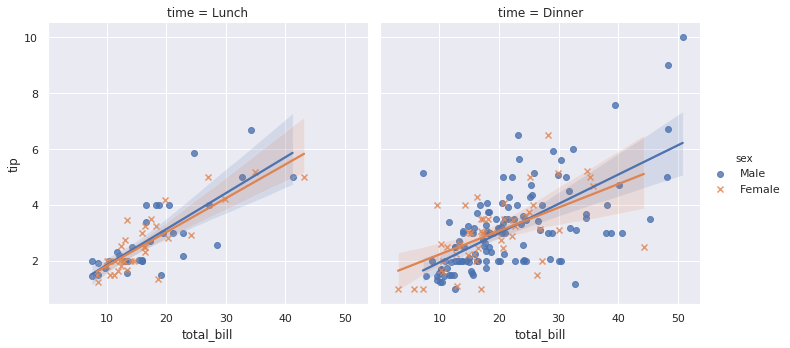

In [253]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o','x'], col = 'time')

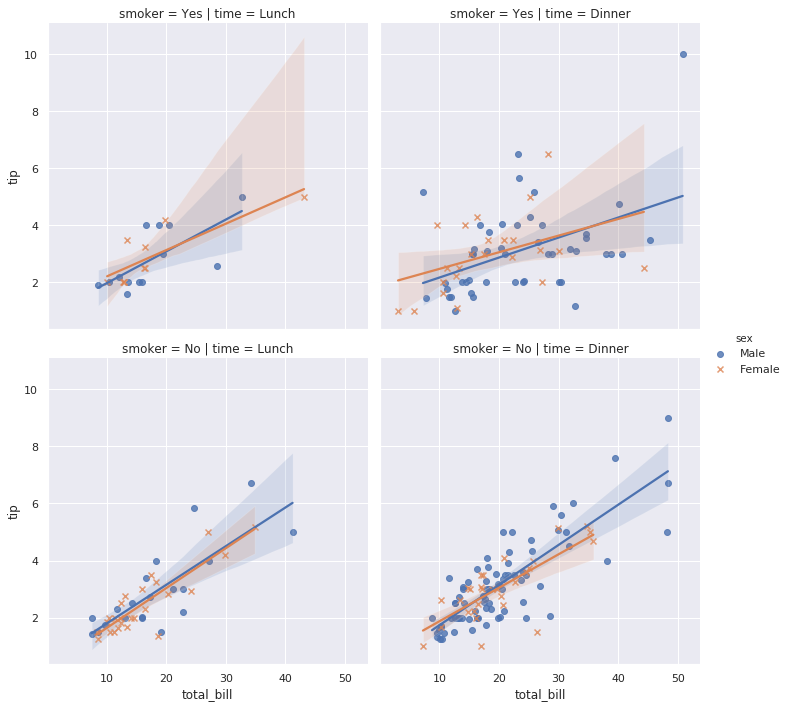

In [254]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o','x'], col = 'time', row = 'smoker')

How can we control the shape and aspect ratio of these plots?...

We can do that with subplots

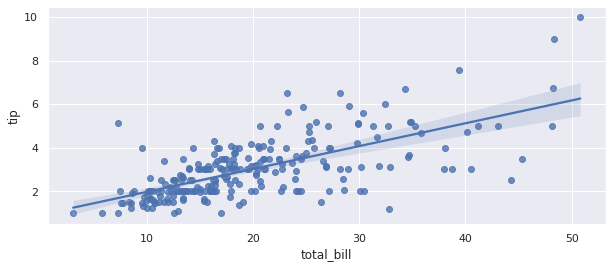

In [258]:
f, axis = plt.subplots(figsize = (10,4))
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = axis)

lmplot doesnt accept axis whereas regplot accepts

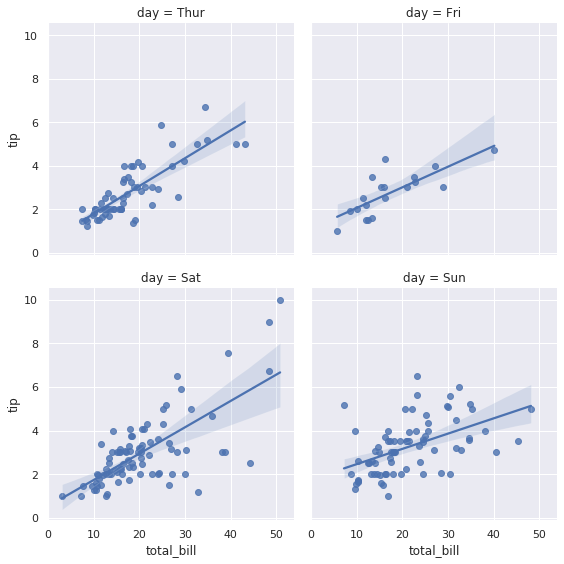

In [263]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', col_wrap = 2, height = 4)

## Setting figure esthetics, color, etc

Now lets create a plot which have lot of sinusoidal signals

In [264]:
def sinplot(flip = 1):
    x = np.linspace(0, 14, 100)
    for i in range(1,7):
        plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)   #some random multiplication and subtraction to get a sine eqation

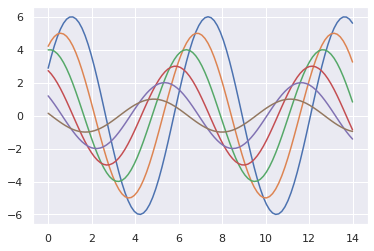

In [267]:
sinplot()

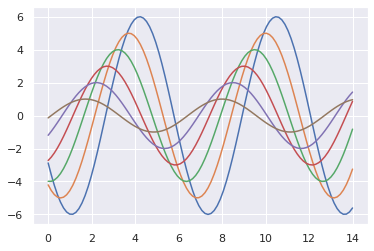

In [268]:
sinplot(-1)

Lets see how to do figure stylling

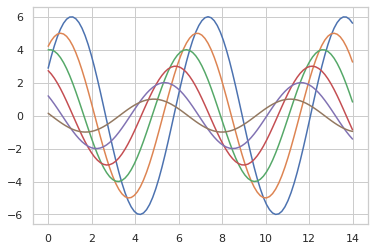

In [271]:
#lets set a white grid
sns.set_style('whitegrid')
sinplot()

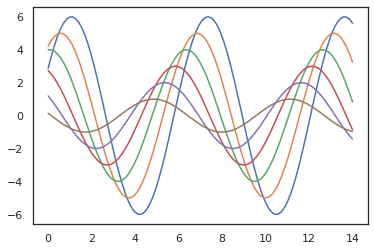

In [272]:
#setting white
sns.set_style('white')
sinplot()

One thing to be noted is that there are no ticks on the axes

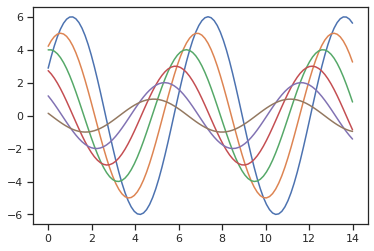

In [274]:
sns.set_style('ticks')
sinplot()

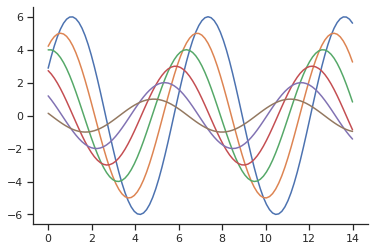

In [277]:
sns.set_style('ticks')
sinplot()
sns.despine()    #this will remove unnecessary axis

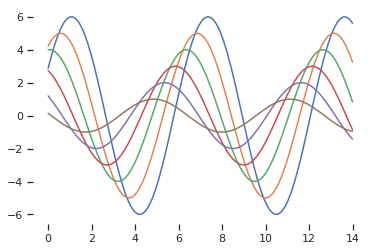

In [279]:
sns.set_style('ticks')
sinplot()
sns.despine(left = True, bottom = True)

How to override the element of a seaborn

In [280]:
#to get all elements/parameters of seaborn
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

Here axes.grid : False, to set it we have to do the following

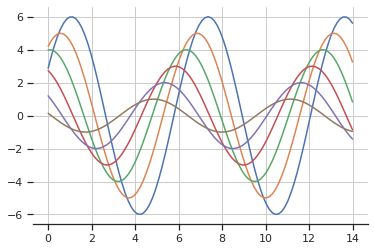

In [287]:
sns.set_style('ticks', {'axes.grid':True,'xtick.direction': 'out'})
sinplot()
sns.despine(left = True)

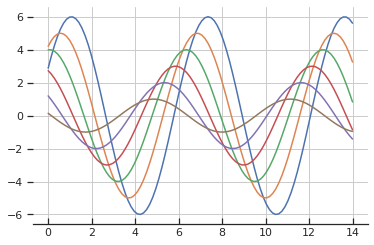

In [288]:
sns.set_style('ticks', {'axes.grid':True,'xtick.direction': 'in'})
sinplot()
sns.despine(left = True)

Note the difference between the in and out of xtick.direction

Lets now see how to do plot scaling 

By default if we see above plots, the texts written along the axes are small. Inorder to overcome that,

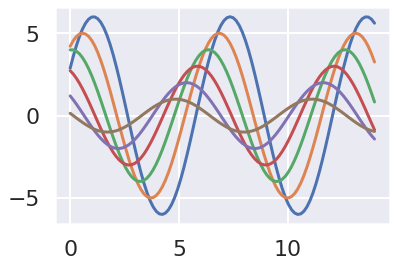

In [295]:
sns.set_context('poster')
sns.set_style('darkgrid')   # we have some other values like 'paper', 'talk'
sinplot()

Now lets see what are the color palattes that are available

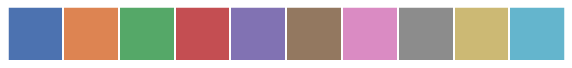

In [297]:
curr_palattes = sns.color_palette()
sns.palplot(curr_palattes)

There is another circular color system

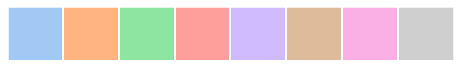

In [302]:
sns.palplot(sns.color_palette('pastel',8))

# End